In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from selenium import webdriver

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [49]:
filepath='/Users/fernandosangerman/Downloads/muni_2018_ProbSequia_2008-2020.xlsx'
filepath1='/Users/fernandosangerman/Downloads/PozosPorMunicipio.xlsx'
url='https://cuentame.inegi.org.mx/monografias/informacion/nl/territorio/div_municipal.aspx?tema=me&e=19'

In [50]:
q=pd.read_excel(filepath)
p=pd.read_excel(filepath1)

In [112]:
q.loc[q.NOM_ENT=='Nuevo LeÛn',"NOM_ENT"]="Nuevo Leon"
dfnl=q.loc[q.NOM_ENT=='Nuevo Leon']
dfnl=dfnl.reset_index(drop=True)
pob=pd.read_html(url)
pobNL=pob[1]
dfnl=dfnl.join(pobNL['Población total 2020'])
dfnl=dfnl.join(pobNL['Municipio'])
dfnl=dfnl.drop(["NOM_MUN","NOM_ENT"],axis=1)
#dfnl=dfnl.sort_values(by=['PROBSEQD0_'])
dfnl=dfnl.drop(2)
dfnl=dfnl.reset_index(drop=True)
dfnl.head()


,CVE_ENT,CVE_MUN,CVEGEO,AREA,PERIMETER,COV_,COV_ID,PROBSEQD0_,NIVELPROBS,Población total 2020,Municipio
0,19,1,19001,4644.99373,46.44994,952,953,0.276151,Baja,2974,Abasolo
1,19,2,19002,97246.30863,972.46309,953,954,0.602510,Alta,3382,Agualeguas
2,19,4,19004,18855.90881,188.55909,955,956,0.338912,Baja,35289,Allende
3,19,5,19005,450980.10900,4509.80109,956,957,0.543933,Media,18030,Anáhuac
4,19,6,19006,22261.12827,222.61128,957,958,0.384937,Baja,656464,Apodaca


In [86]:
top10seq=dfnl.sort_values(by=['PROBSEQD0_']).tail(10)
top10nseq=dfnl.sort_values(by=['PROBSEQD0_']).head(10)

<AxesSubplot:xlabel='Municipio'>

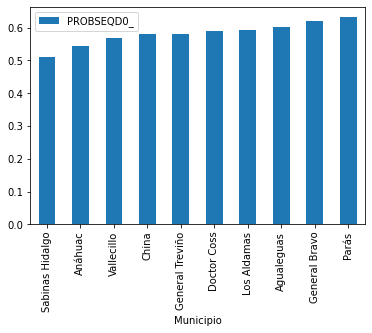

In [74]:
top10seq.plot.bar(x="Municipio",y="PROBSEQD0_")

<AxesSubplot:xlabel='Municipio'>

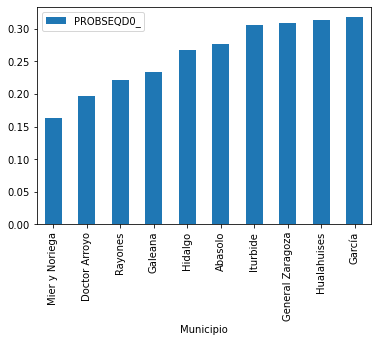

In [75]:
top10nseq.plot.bar(x="Municipio",y="PROBSEQD0_")

<BarContainer object of 4 artists>

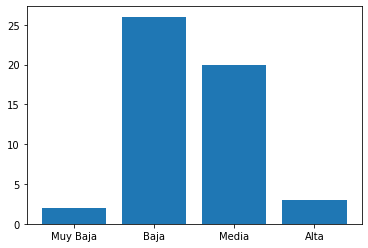

In [40]:
nmb=dfnl.loc[dfnl.NIVELPROBS=="Muy Baja", "NIVELPROBS"].count()
nb=dfnl.loc[dfnl.NIVELPROBS=="Baja", "NIVELPROBS"].count()
nm=dfnl.loc[dfnl.NIVELPROBS=="Media", "NIVELPROBS"].count()
na=dfnl.loc[dfnl.NIVELPROBS=="Alta", "NIVELPROBS"].count()
NivelProbA=[nmb,nb,nm,na]
NivelesA=list(dfnl["NIVELPROBS"].unique())
plt.bar(x=NivelesA,height=NivelProbA)

In [41]:
dfnl["PROBSEQD0_"].describe()

count    51.000000
mean      0.405858
std       0.112747
min       0.163180
25%       0.341004
50%       0.393305
75%       0.466527
max       0.631799
Name: PROBSEQD0_, dtype: float64

[Text(0.5, 14.09375, '\nDatos de Nuevo Léon'),
 Text(32.09375, 0.5, 'Datos de Nuevo León\t'),
 Text(0.5, 1.0, 'Matriz de Correlación de Datos de Nuevo León\n')]

/Users/fernandosangerman/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/fernandosangerman/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


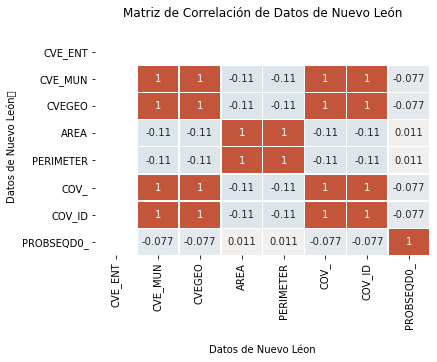

In [45]:
corr = sns.heatmap(dfnl.corr(), annot=True ,center=0, linewidths=.5, cbar=False, cmap=sns.diverging_palette(230, 20, as_cmap=True))
corr.set(xlabel='\nDatos de Nuevo Léon', ylabel='Datos de Nuevo León\t', title = "Matriz de Correlación de Datos de Nuevo León\n")

In [110]:
p["NOMBRE DE ESTADO"].unique()
dfnla=p.loc[p['NOMBRE DE ESTADO']=='NUEVO LEÓN']
mun=list(dfnla["NOMBRE DE MUNICIPIO"].unique())
mun.sort()

In [82]:
aguamun=[]
for m in mun:
    aguamun.append(dfnla.loc[dfnla['NOMBRE DE MUNICIPIO']==m, "VOLUMEN ANUAL EN m3"].sum())

50

In [94]:
dfnl['Volumen en m3 de agua por municipio']=aguamun

In [111]:
dfnl.head()

,CVE_ENT,CVE_MUN,CVEGEO,AREA,PERIMETER,COV_,COV_ID,PROBSEQD0_,NIVELPROBS,Población total 2020,Municipio,Volumen en m3 de agua por municipio
0,19,1,19001,4644.99373,46.44994,952,953,0.276151,Baja,2974,Abasolo,142845.00
1,19,2,19002,97246.30863,972.46309,953,954,0.602510,Alta,3382,Agualeguas,10023583.80
2,19,4,19004,18855.90881,188.55909,955,956,0.338912,Baja,35289,Allende,5329277.95
3,19,5,19005,450980.10900,4509.80109,956,957,0.543933,Media,18030,Anáhuac,2634101.00
4,19,6,19006,22261.12827,222.61128,957,958,0.384937,Baja,656464,Apodaca,18740413.67


In [108]:
x=dfnl[["AREA","PERIMETER","Población total 2020","Volumen en m3 de agua por municipio"]]
y=dfnl["PROBSEQD0_"]
train_X, val_X, train_y, val_y = train_test_split(x, y, random_state=1)
model=RandomForestRegressor(random_state=1,max_leaf_nodes=10,max_depth=2)
model.fit(train_X,train_y)
predictions=model.predict(val_X)
val_mae = mean_absolute_error(predictions, val_y)
print("Validation MAE: "+ str(val_mae))


Validation MAE: 0.06340429605430192
